# Preliminary laboratory testing

#### Our first WeatherCube tests went well and we're excited to look at the results.

We spent the day collaborating with researchers at UM College Park and JHU to test the sensitivity of the spec ozone sensor under dry air conditions and moist air while varying ozone. This test is an important first step, but by no means complete. 

First, we set up our analysis code. 

In [47]:
# code preliminaries: import libraries and define plotting functions
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import scipy.stats
def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    #r = np.corrcoef(x[ind], y[ind])[0,1]
    r,p = scipy.stats.pearsonr(x[ind], y[ind])
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r= %.2f'%r, xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p= %.2f'%p, xy=(.5, .7), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p
# 

In [2]:
# import data 
cols = ['time', 'id', 'value', 'temp', 'rh', 'raw_value', 'raw_temp', 'raw_rh', '1', '2', '3', '4']
#df = pd.read_csv('output.csv')
df = pd.read_csv('output1.csv')

df.columns = cols
df.index = [datetime.datetime.fromtimestamp(a) for a in df['time'].values]# pd.DatetimeIndex(df['time'])

In [3]:
frames = []
files = ['output.csv', 'output1.csv']
for file in files: 
    df = pd.read_csv(file)
    df.columns = cols
    frames.append(df)
    
df = pd.concat(frames)
df.index = [datetime.datetime.fromtimestamp(a) for a in df['time'].values]# pd.DatetimeIndex(df['time'])
#df.to_csv('fullApril212017UMDozonerhtest.csv')
#frames.append(pd.read_csv('output1.csv'))

In [7]:
# write datasheet for what the laboratory values were
lab_df = pd.DataFrame(index = df.index, columns = ['o3', 'rh'])
# enter ozone values from reference instrument
lab_df['o3'].loc[:'2017-04-21 11:07:00'] = 0.0
lab_df['o3'].loc['2017-04-21 11:07:01':'2017-04-21 11:37:00'] = 157.0
lab_df['o3'].loc['2017-04-21 11:37:01':'2017-04-21 11:53:00'] = 11.2
lab_df['o3'].loc['2017-04-21 11:53:01':'2017-04-21 12:09:00'] = 105.8
lab_df['o3'].loc['2017-04-21 12:09:01':'2017-04-21 12:22:00'] = 48.4
lab_df['o3'].loc['2017-04-21 12:22:01':'2017-04-21 12:40:00'] = 33.7
lab_df['o3'].loc['2017-04-21 12:40:00':'2017-04-21 12:55:00'] = 15.6
lab_df['o3'].loc['2017-04-21 12:55:01':'2017-04-21 14:30:00'] = 9.4
lab_df['o3'].loc['2017-04-21 14:30:01':'2017-04-21 14:45:00'] = 155.3
lab_df['o3'].loc['2017-04-21 14:45:01':'2017-04-21 15:10:00'] = 75.0

lab_df['o3'].loc['2017-04-21 15:10:01':'2017-04-21 15:25:00'] = 100.0
lab_df['o3'].loc['2017-04-21 15:25:01':'2017-04-21 15:45:00'] = 84.3
lab_df['o3'].loc['2017-04-21 15:45:01':'2017-04-21 16:00:00'] = 125.0
lab_df['o3'].loc['2017-04-21 16:00:01':'2017-04-21 16:18:00'] = 26.0
lab_df['o3'].loc['2017-04-21 16:18:01':'2017-04-21 16:35:00'] = 20.0
lab_df['o3'].loc['2017-04-21 16:35:01':] = 9.2
lab_df['o3'] = (lab_df['o3'] - 9.2).astype(float)

#enter rh values from calculations
lab_df['rh'].loc[:'2017-04-21 14:45:00'] = 0.0
lab_df['rh'].loc['2017-04-21 14:45:01':'2017-04-21 15:10:00'] = 50.0
lab_df['rh'].loc['2017-04-21 15:10:01':'2017-04-21 15:25:00'] = 33.0
lab_df['rh'].loc['2017-04-21 15:25:01':'2017-04-21 15:45:00'] = 44.0
lab_df['rh'].loc['2017-04-21 15:45:01':'2017-04-21 16:00:00'] = 20.0
lab_df['rh'].loc['2017-04-21 16:00:01':'2017-04-21 16:18:00'] = 50.0
lab_df['rh'].loc['2017-04-21 16:18:01':'2017-04-21 16:35:00'] = 50.0
lab_df['rh'].loc['2017-04-21 16:35:01':] = 50.0
lab_df['rh'] = lab_df['rh'].astype(float)
#lab_df['rh'].values = lab_df['rh'].values.astype(float)

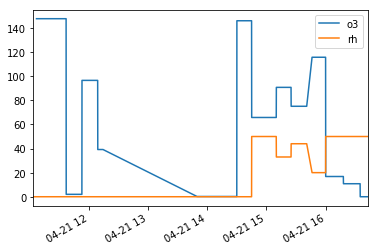

In [8]:
lab_df.plot()

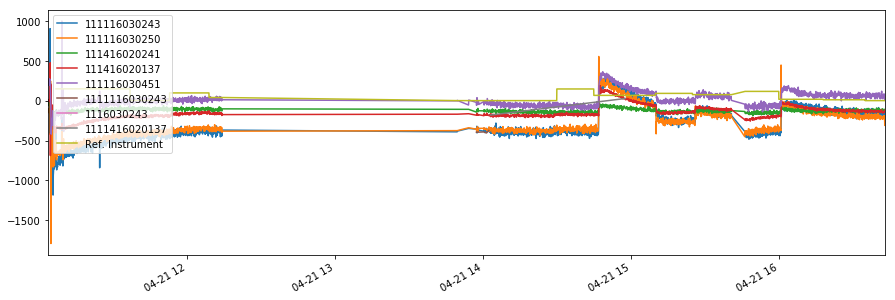

In [9]:
# plot all data
plt.figure(figsize= [15,5])
for id in df.id.unique():
    df[df.id == id]['value'].plot(label = id)

lab_df['o3'].plot(label = 'Ref. Instrument')
plt.legend(loc = 2)
#plt.xlim([])

Note that we had connection issues over lunch and lost data. Note also that the instruments need time to stabilize after being turned on. 

# Callibrating the sensors to zero 

### One proposed approach for callibration is to simply subtract off zero values. This is unlikely to work for a metal oxide sensor, but worth a shot. 

In [50]:
# callibrate: subtract off zero values
cal_period_start = '2017-04-21 12:55:01'
cal_period_end = '2017-04-21 14:30:00'
ids  = df.id.unique()[0:5]
#ids = ids[1:-1]
callibration = pd.DataFrame(np.ones([ids.shape[0], 3]), 
                            columns = ['mean', 'std_dev', 'median'],  index = ids)
for id in ids: 
    callibration.loc[id]['mean'] = df[df.id==id]['value'][cal_period_start:cal_period_end].mean()
    callibration.loc[id]['std_dev'] = df[df.id==id]['value'][cal_period_start:cal_period_end].std()
    callibration.loc[id]['median'] = df[df.id==id]['value'][cal_period_start:cal_period_end].median()

In [51]:
# callibration values
callibration

,mean,std_dev,median
111116030243,-391.461111,30.584713,-391.0
111116030250,-373.723757,20.529310,-375.0
111416020241,-138.466851,14.049192,-139.0
111416020137,-187.802778,10.009605,-188.0
111116030451,-52.730978,24.196987,-51.0


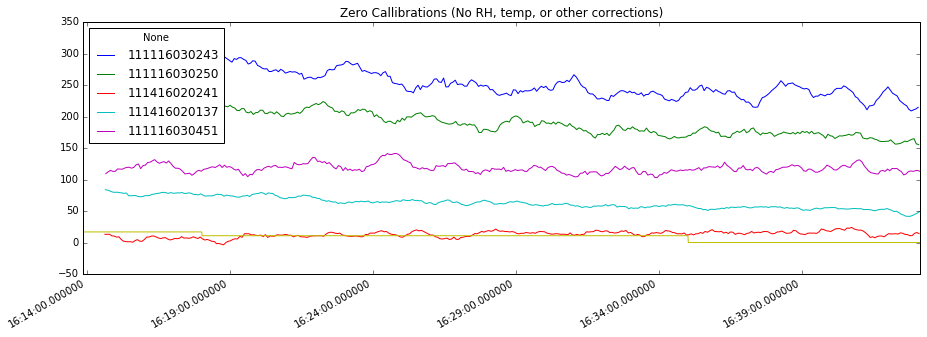

In [66]:
plt.figure(figsize= [15,5])
for id in ids:
    df[df.id == id]['value'].iloc[-360:].rolling(10).mean().subtract(callibration.loc[id]['mean']).plot(label = id)
#    df[df.id == id]['value'].iloc[-360:].plot(style = 'o', label = id)
    
plt.legend(loc = 2)
lab_df['o3'].iloc[-1800:].plot(label = 'Ref. Instrument')
plt.title('Zero Callibrations (No RH, temp, or other corrections)')

### As expected, this approach works poorly. 

# Next, we callibrate taking cross sensitivity into account. 

### Specifically, we take into account the relationship with humidity. 

Again, we set up our data sheets. 

In [71]:
# no2 = xxx 20137
m = 5
id = 111116030243
corrected_df = pd.DataFrame()
corrected_df['true_o3']  = lab_df['o3']
corrected_df['measured_o3'] = df[df.id ==id]['value']
corrected_df['calculated_rh'] = lab_df['rh']
corrected_df['measured_rh'] = df[df.id ==id]['rh']
corrected_df['measured_temp'] = df[df.id ==id]['temp']

### We compute a multiple linear regression of ozone using sensor-derived ozone, temperature, and humidity. 

In [68]:
result = sm.ols(formula="true_o3 ~ measured_o3+ calculated_rh", 
                data=corrected_df['2017-04-21 14:30:00':].resample('30S').mean()).fit()
print(result.params)
print(result.summary())

Intercept        189.902198
measured_o3        0.071233
calculated_rh     -2.935259
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                true_o3   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     489.9
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           6.69e-88
Time:                        16:39:12   Log-Likelihood:                -1146.2
No. Observations:                 257   AIC:                             2298.
Df Residuals:                     254   BIC:                             2309.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------

In [12]:
result.params

Intercept        61.859755
measured_o3      -0.008999
calculated_rh    -0.316952
dtype: float64

### Using the parameters from our regression analysis, we see if we can improve the readings. 

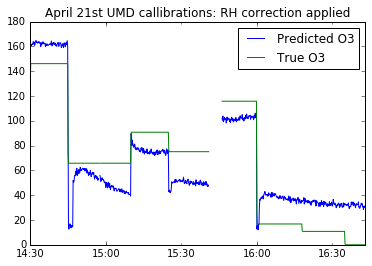

In [69]:
predicted_ozone = corrected_df['measured_o3']*result.params['measured_o3'] + corrected_df['calculated_rh']*result.params['calculated_rh']+ result.params['Intercept']
predicted_ozone['2017-04-21 14:30:00':].resample('10S').mean().plot(label = 'predicted ozone')
lab_df['o3']['2017-04-21 14:30:00':].resample('10S').mean().plot(label = 'true ozone')
plt.legend(['Predicted O3', 'True O3', 'RH'])
plt.title('April 21st UMD callibrations: RH correction applied')
#lab_df['rh']['2017-04-21 14:30:00':].resample('10S').mean().plot(label = 'RH', secondary_y = True)

Not great, but a heck of a lot better than the 300ppb spread we started with. 

### How does this approach compare with just callibrating using a zero value? 
First, we look at a callibration to the zero gas.  

(-1.1344899039744067, -0.54757866806747257, 3.8484839723069325e-61)

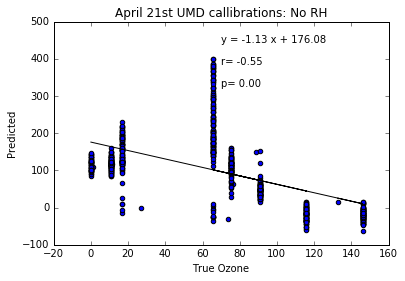

In [60]:
# compare to just callibrating
easy_scatter(lab_df['o3']['2017-04-21 14:30:00':].resample('10S').mean(), 
             df[df.id == id]['value']['2017-04-21 14:30:00':].resample('10S').mean().subtract(callibration.loc[id]['mean']), 
             'April 21st UMD callibrations: No RH', 
                         'True Ozone', 'Predicted')

Next, we look at our cross-sensitivity based callibration. 

In [62]:
result = sm.ols(formula="true_o3 ~ measured_o3+ calculated_rh + measured_temp", 
                data=corrected_df['2017-04-21 14:30:00':].resample('30S').mean()).fit()
print(result.params)
print(result.summary())

Intercept        995.635135
measured_o3        0.069921
calculated_rh     -2.833743
measured_temp    -29.911387
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                true_o3   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     373.3
Date:                Mon, 24 Apr 2017   Prob (F-statistic):           1.41e-92
Time:                        16:32:55   Log-Likelihood:                -1132.0
No. Observations:                 257   AIC:                             2272.
Df Residuals:                     253   BIC:                             2286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-

(0.81800493051335588, 0.90223378425992151, 2.7272976614158679e-281)

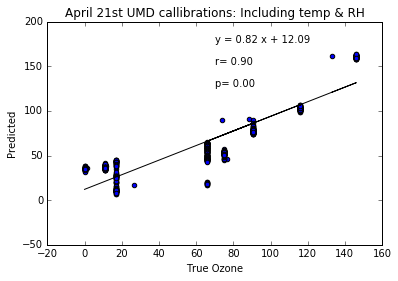

In [65]:
predicted_ozone = corrected_df['measured_o3']*result.params['measured_o3'] + corrected_df['calculated_rh']*result.params['calculated_rh']+ corrected_df['measured_temp']*result.params['measured_temp']+result.params['Intercept']
easy_scatter(lab_df['o3']['2017-04-21 14:30:00':].resample('10S').mean(), 
            predicted_ozone['2017-04-21 14:30:00':].resample('10S').mean(), 
             'April 21st UMD callibrations: Including temp & RH',
             'True Ozone', 'Predicted')

# Conclusions

### Taking into account cross-sensitivity yields a more accurate callibration then just by comparing zero values alone. 

Work is planned to examine the relationship between NO2 and O3 under humid conditions, as well as trace gasses SO2 and H2S. Future experiments need to be done with sensors that have been turned on for several days. 